In [1]:
import pandas as pd



In [2]:
df=pd.read_csv("Case_Study_Dataset_Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.drop(labels="CustomerId",axis=1,inplace=True)


In [8]:
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
x=df.drop(labels="Exited",axis=1)
y=df["Exited"]

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Surname']=encoder.fit_transform(df['Surname'])


In [11]:
x=pd.get_dummies(data=df,columns=["Geography","Gender"])


In [12]:
x

,RowNumber,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1115,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,1177,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,2040,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,289,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,1822,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1999,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,1336,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,1570,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,2345,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [13]:
x.dtypes

RowNumber              int64
Surname                int32
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

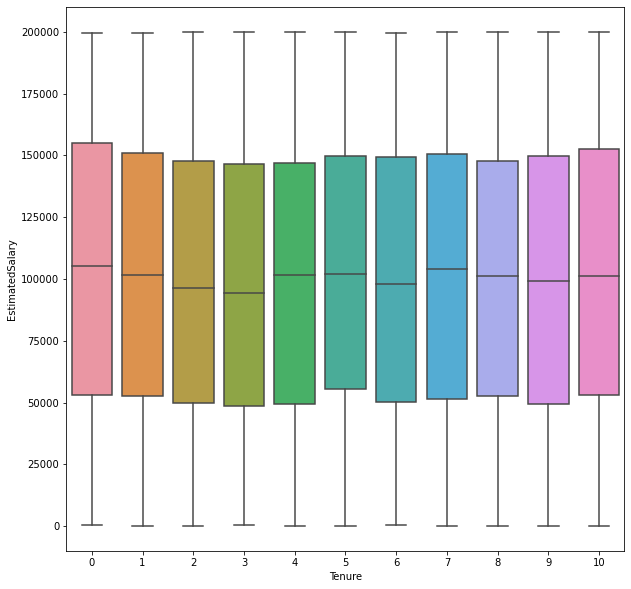

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])

sns.boxplot(x="Tenure",y="EstimatedSalary",data=df)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()

parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

model = GridSearchCV(knn, param_grid=parameters)
model.fit(x_train,y_train)


prediction=model.predict(x_test)

In [17]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(y_test,prediction)
acc

0.779

In [19]:
con=confusion_matrix(y_test,prediction)
con

array([[2322,   47],
       [ 616,   15]], dtype=int64)

In [20]:
report=classification_report(y_test,prediction)

print(report)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      2369
           1       0.24      0.02      0.04       631

    accuracy                           0.78      3000
   macro avg       0.52      0.50      0.46      3000
weighted avg       0.67      0.78      0.70      3000

